In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sci
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_boston

In [8]:
file=load_boston()

In [9]:
file

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [11]:
df=pd.DataFrame(data=file.data, columns=file.feature_names)

In [14]:
df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

In [15]:
df['target']=pd.DataFrame(file.target)

In [16]:
df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  target  
0       15.3  396.90   4.98    24.0  
1       17.8  396.90   9.14    21.6  
2       17.8  392.83   4.03    34.7  
3       18.7  394.63   2.94    33.4  
4       18.7  396.90   5.33    36.2  
..       ...     ...    ...     ...  
501     21.0  391.99   9.67    22.4  
502     21.0  396.90   9.08    20.6  
503     21.0  396.90   5.64    23.9  
504     21.0  393.45   6.48    22.0  
505     21.0  396.90   7.88    11.9  

[506 rows x 14 columns]

### EDA Process

In [17]:
df.shape

(506, 14)

In [18]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

In [19]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

In [20]:
df.tail()

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  target  
501     21.0  391.99   9.67    22.4  
502     21.0  396.90   9.08    20.6  
503     21.0  396.90   5.64    23.9  
504     21.0  393.45   6.48    22.0  
505     21.0  396.90   7.88    11.9

In [22]:
df.sample(7)

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
160  1.27346   0.0  19.58   1.0  0.605  6.250   92.6  1.7984   5.0  403.0   
217  0.07013   0.0  13.89   0.0  0.550  6.642   85.1  3.4211   5.0  276.0   
143  4.09740   0.0  19.58   0.0  0.871  5.468  100.0  1.4118   5.0  403.0   
54   0.01360  75.0   4.00   0.0  0.410  5.888   47.6  7.3197   3.0  469.0   
396  5.87205   0.0  18.10   0.0  0.693  6.405   96.0  1.6768  24.0  666.0   
198  0.03768  80.0   1.52   0.0  0.404  7.274   38.3  7.3090   2.0  329.0   
319  0.47547   0.0   9.90   0.0  0.544  6.113   58.8  4.0019   4.0  304.0   

     PTRATIO       B  LSTAT  target  
160     14.7  338.92   5.50    27.0  
217     16.4  392.78   9.69    28.7  
143     14.7  396.90  26.42    15.6  
54      21.1  396.90  14.80    18.9  
396     20.2  396.90  19.37    12.5  
198     12.6  392.20   6.62    34.6  
319     18.4  396.23  12.73    21.0

<AxesSubplot:>

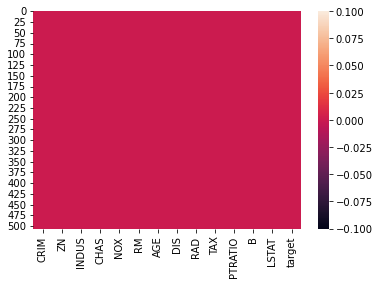

In [23]:
sns.heatmap(df.isnull())

### Summary stats

In [24]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT      target  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [25]:
df.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
target     1.108098
dtype: float64

<AxesSubplot:xlabel='CRIM'>

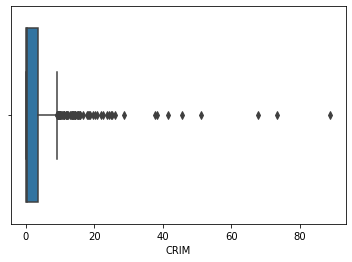

In [26]:
sns.boxplot(df['CRIM'])

<AxesSubplot:xlabel='ZN'>

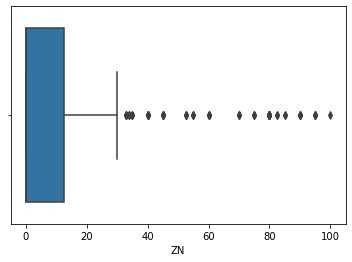

In [27]:
sns.boxplot(df['ZN'])

<AxesSubplot:xlabel='B'>

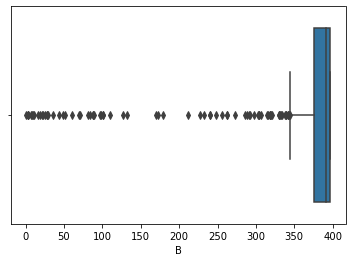

In [28]:
sns.boxplot(df['B'])

CRIM          AxesSubplot(0.125,0.657941;0.133621x0.222059)
ZN         AxesSubplot(0.285345,0.657941;0.133621x0.222059)
INDUS       AxesSubplot(0.44569,0.657941;0.133621x0.222059)
CHAS       AxesSubplot(0.606034,0.657941;0.133621x0.222059)
NOX        AxesSubplot(0.766379,0.657941;0.133621x0.222059)
RM            AxesSubplot(0.125,0.391471;0.133621x0.222059)
AGE        AxesSubplot(0.285345,0.391471;0.133621x0.222059)
DIS         AxesSubplot(0.44569,0.391471;0.133621x0.222059)
RAD        AxesSubplot(0.606034,0.391471;0.133621x0.222059)
TAX        AxesSubplot(0.766379,0.391471;0.133621x0.222059)
PTRATIO          AxesSubplot(0.125,0.125;0.133621x0.222059)
B             AxesSubplot(0.285345,0.125;0.133621x0.222059)
LSTAT          AxesSubplot(0.44569,0.125;0.133621x0.222059)
target        AxesSubplot(0.606034,0.125;0.133621x0.222059)
dtype: object

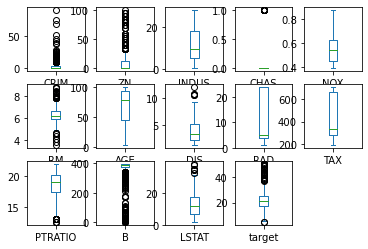

In [29]:
df.plot(kind='box', subplots=True, layout=(3,5))

### Removing outliers

In [30]:
from scipy.stats import zscore

In [31]:
z=np.abs(zscore(df))

In [32]:
z

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0    0.419782  0.284830  1.287909  0.272599  0.144217  0.413672  0.120013   
1    0.417339  0.487722  0.593381  0.272599  0.740262  0.194274  0.367166   
2    0.417342  0.487722  0.593381  0.272599  0.740262  1.282714  0.265812   
3    0.416750  0.487722  1.306878  0.272599  0.835284  1.016303  0.809889   
4    0.412482  0.487722  1.306878  0.272599  0.835284  1.228577  0.511180   
..        ...       ...       ...       ...       ...       ...       ...   
501  0.413229  0.487722  0.115738  0.272599  0.158124  0.439316  0.018673   
502  0.415249  0.487722  0.115738  0.272599  0.158124  0.234548  0.288933   
503  0.413447  0.487722  0.115738  0.272599  0.158124  0.984960  0.797449   
504  0.407764  0.487722  0.115738  0.272599  0.158124  0.725672  0.736996   
505  0.415000  0.487722  0.115738  0.272599  0.158124  0.362767  0.434732   

          DIS       RAD       TAX   PTRATIO         B     LSTAT    target  
0    0.140214  0.982843  0.666608  1.459000  0.441052  1.075562  0.159686  
1    0.557160  0.867883  0.987329  0.303094  0.441052  0.492439  0.101524  
2    0.557160  0.867883  0.987329  0.303094  0.396427  1.208727  1.324247  
3    1.077737  0.752922  1.106115  0.113032  0.416163  1.361517  1.182758  
4    1.077737  0.752922  1.106115  0.113032  0.441052  1.026501  1.487503  
..        ...       ...       ...       ...       ...       ...       ...  
501  0.625796  0.982843  0.803212  1.176466  0.387217  0.418147  0.014454  
502  0.716639  0.982843  0.803212  1.176466  0.441052  0.500850  0.210362  
503  0.773684  0.982843  0.803212  1.176466  0.441052  0.983048  0.148802  
504  0.668437  0.982843  0.803212  1.176466  0.403225  0.865302  0.057989  
505  0.613246  0.982843  0.803212  1.176466  0.441052  0.669058  1.157248  

[506 rows x 14 columns]

In [33]:
np.where(z>3)

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
        200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
        220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
        277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
        357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
        380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
        416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
        437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64),
 array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
         1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
         5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
         3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
         0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
        11,  0, 11, 11, 11, 11, 11, 11, 1

### Removing skewness

In [34]:
df.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
target     1.108098
dtype: float64

<AxesSubplot:xlabel='CRIM', ylabel='Density'>

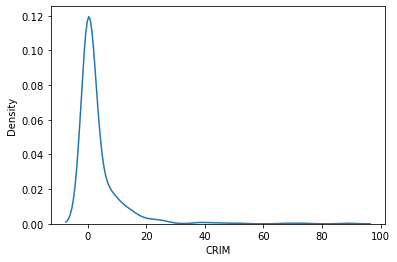

In [35]:
sns.kdeplot(df['CRIM'])

<AxesSubplot:xlabel='INDUS', ylabel='Density'>

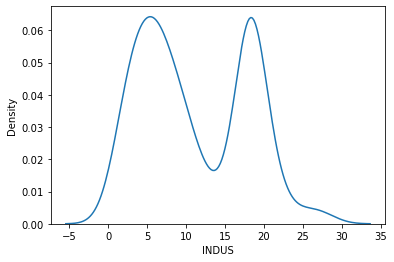

In [36]:
sns.kdeplot(df['INDUS'])

<AxesSubplot:xlabel='CHAS', ylabel='Density'>

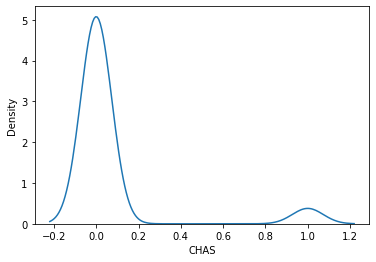

In [37]:
sns.kdeplot(df['CHAS'])

In [38]:
df['CRIM']=np.log(df['CRIM'])

<AxesSubplot:xlabel='CRIM', ylabel='Density'>

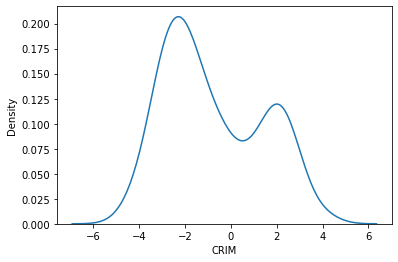

In [39]:
sns.kdeplot(df['CRIM'])

<AxesSubplot:xlabel='B', ylabel='target'>

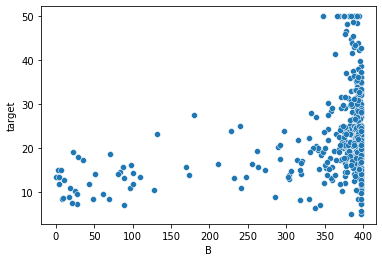

In [40]:
sns.scatterplot(df['B'], df['target'])

<AxesSubplot:xlabel='TAX', ylabel='target'>

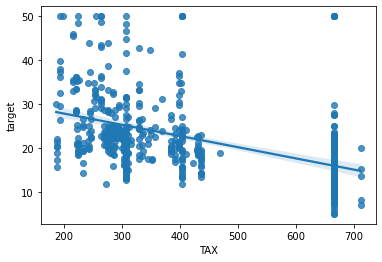

In [41]:
sns.regplot(df['TAX'], df['target'])

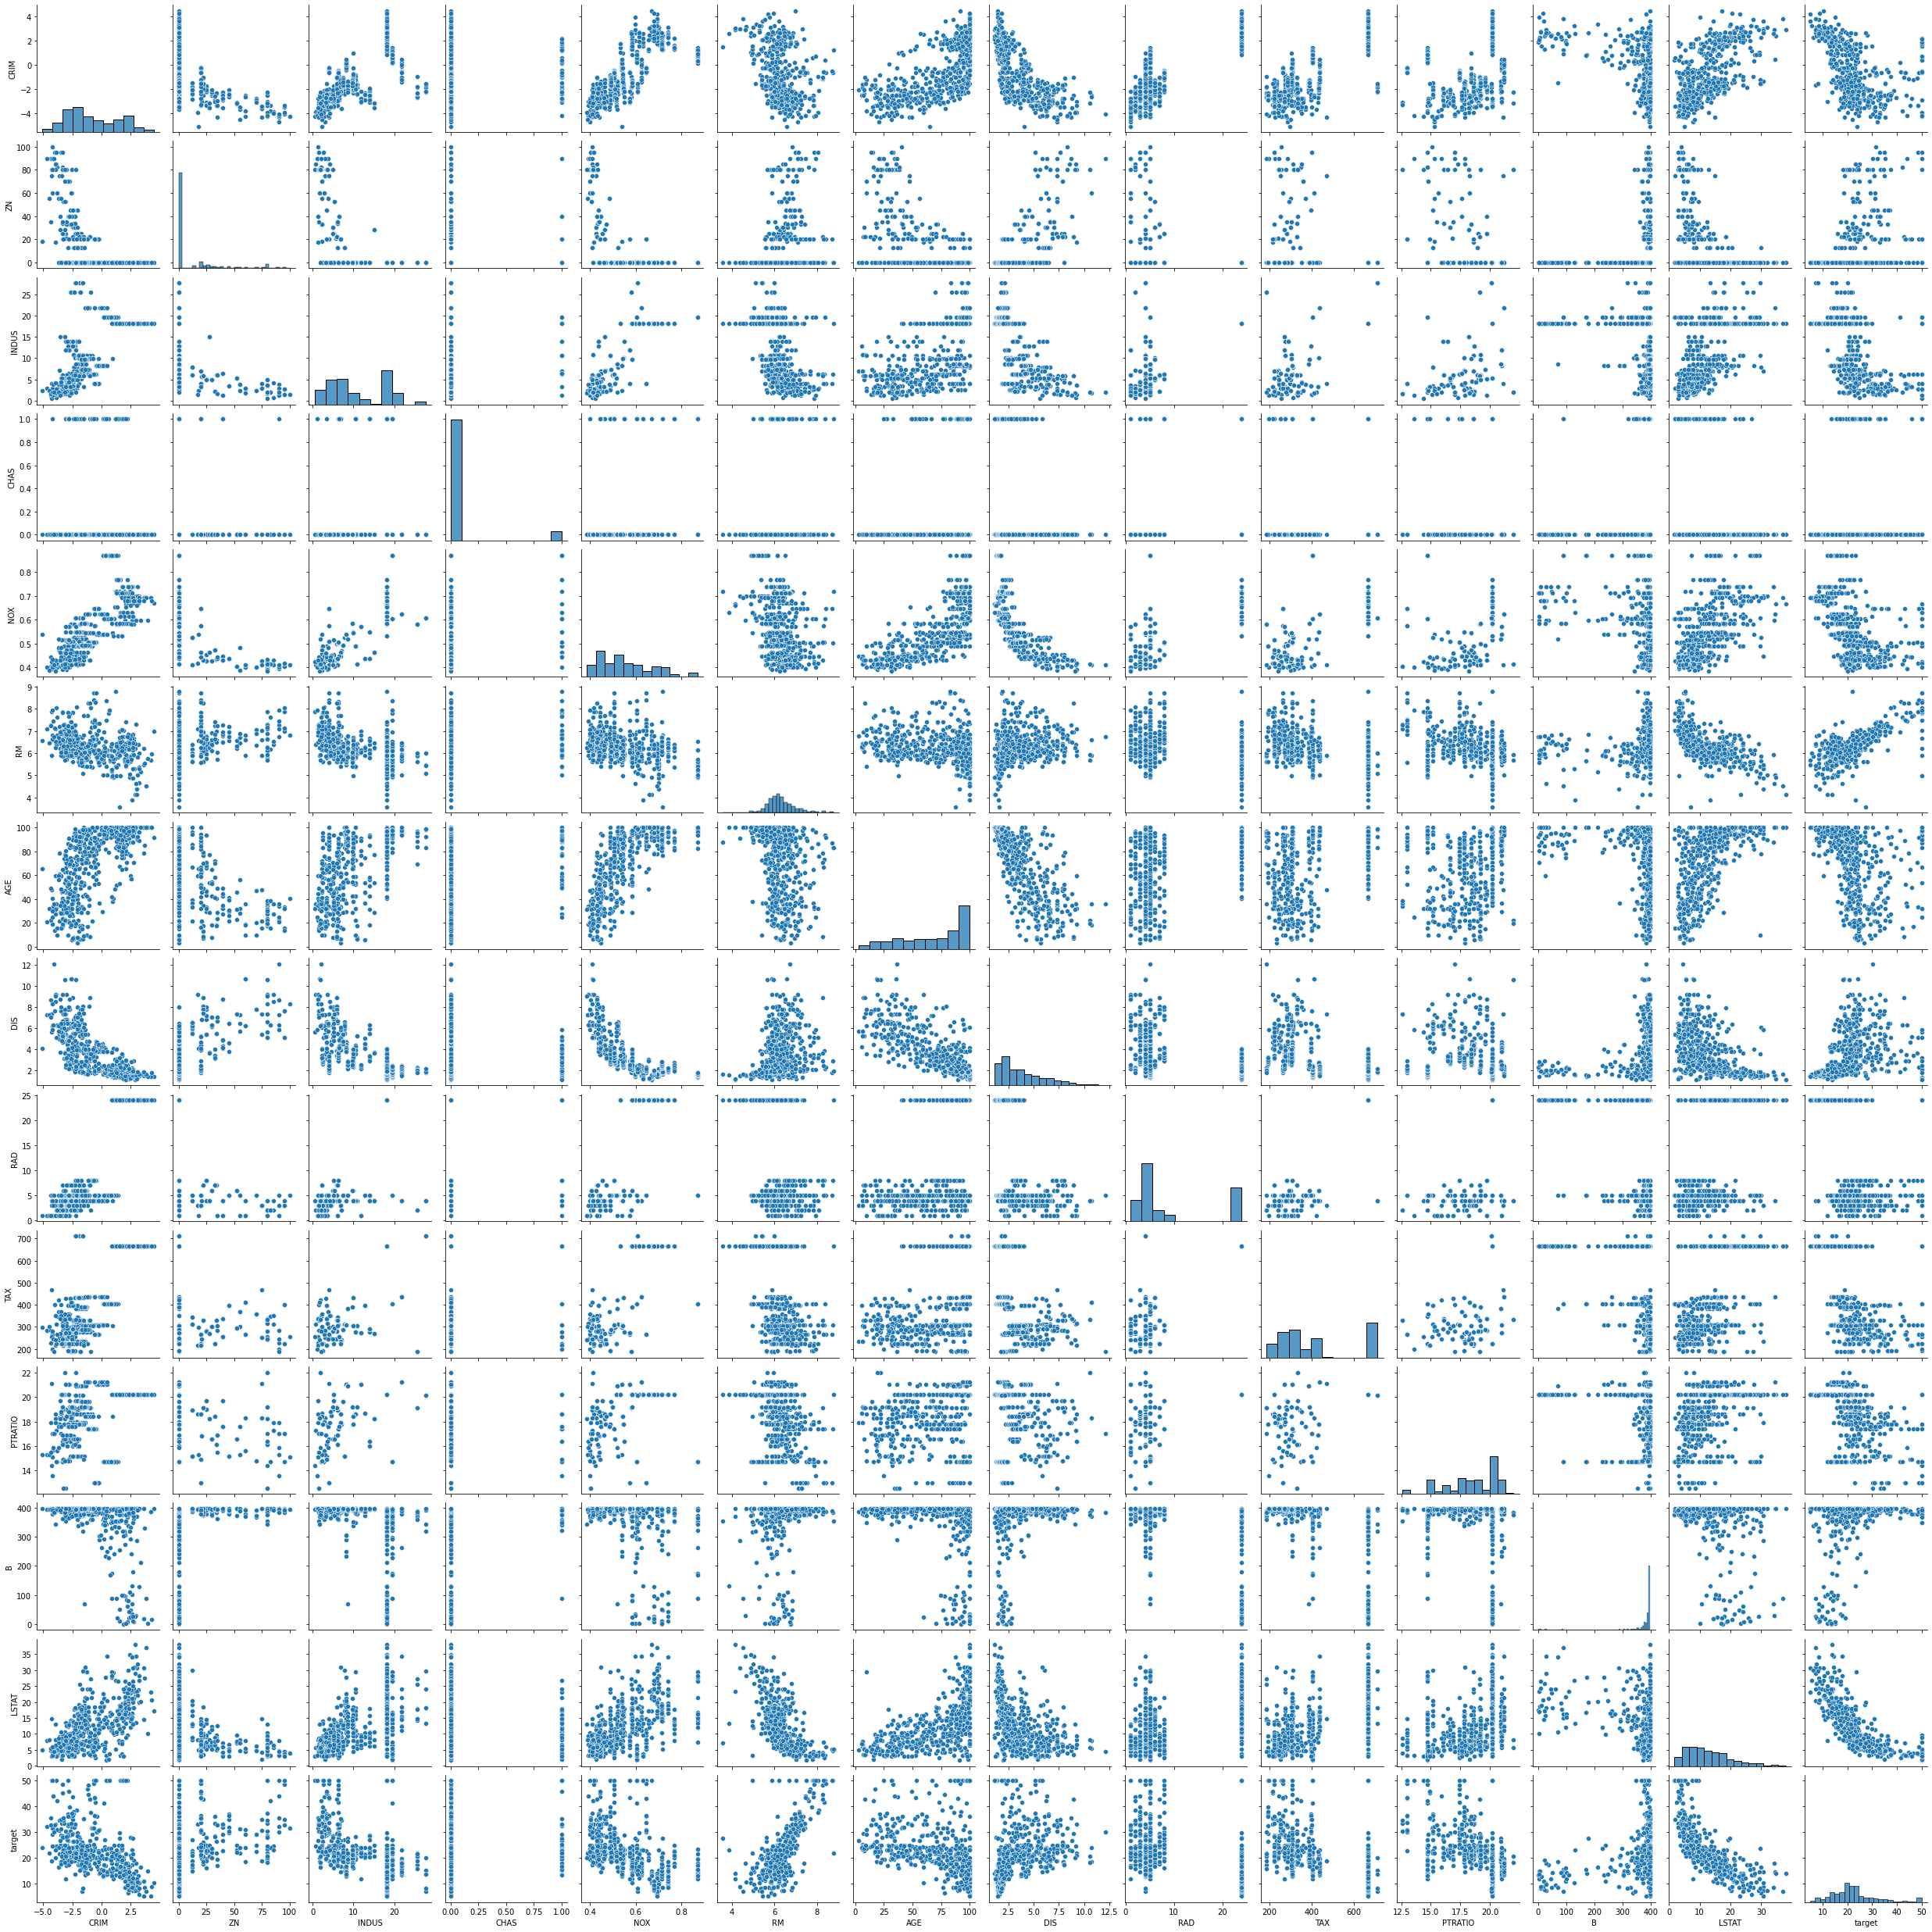

In [42]:
sns.pairplot(df)

### Co-relation

<AxesSubplot:>

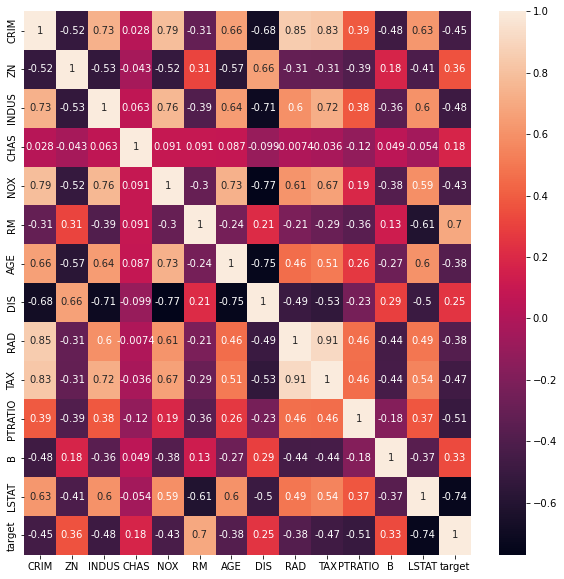

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='LSTAT', ylabel='target'>

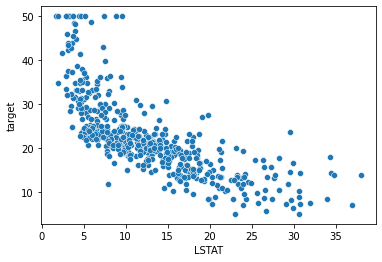

In [44]:
sns.scatterplot(df['LSTAT'], df['target'])

In [45]:
df.drop('LSTAT', axis=1, inplace=True)

In [46]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0 -5.064036  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1 -3.600502   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2 -3.601235   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3 -3.430523   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4 -2.672924   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  target  
0     15.3  396.90    24.0  
1     17.8  396.90    21.6  
2     17.8  392.83    34.7  
3     18.7  394.63    33.4  
4     18.7  396.90    36.2

In [47]:
df.shape

(506, 13)

In [48]:
newdf=df[(z<3).all (axis=1)]

In [49]:
newdf

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0   -5.064036  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1   -3.600502   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2   -3.601235   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3   -3.430523   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4   -2.672924   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..        ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501 -2.770511   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502 -3.095111   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503 -2.800824   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504 -2.211009   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505 -3.048922   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  target  
0       15.3  396.90    24.0  
1       17.8  396.90    21.6  
2       17.8  392.83    34.7  
3       18.7  394.63    33.4  
4       18.7  396.90    36.2  
..       ...     ...     ...  
501     21.0  391.99    22.4  
502     21.0  396.90    20.6  
503     21.0  396.90    23.9  
504     21.0  393.45    22.0  
505     21.0  396.90    11.9  

[415 rows x 13 columns]

In [50]:
df.shape

(506, 13)

In [51]:
newdf.shape

(415, 13)

### Training